<h1 style="text-align:center">MoodMapper</h1>

<h4 style="text-align:center">Using a Recurrent Neural Network (RNN) to classify movie reviews as positive or negative.</h4>

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
seed(1)
import shutil
import re
import string
import tensorflow as tf
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding, TextVectorization
from keras.optimizers import Adam
from sklearn.linear_model import LinearRegression

In [59]:
df = pd.read_csv("dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [60]:
pattern = np.array(list(range(10))).astype(float)
pattern

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [61]:
window_size = 3

#generate training data
train_data = [np.array(pattern[i:i+window_size]).reshape(1,-1) for i in range(pattern.shape[0]-window_size)]
train_data = np.concatenate(train_data*10, axis=0)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)

In [62]:
train_data.shape

(70, 3, 1)

In [63]:
train_data[:3]

array([[[0.],
        [1.],
        [2.]],

       [[1.],
        [2.],
        [3.]],

       [[2.],
        [3.],
        [4.]]])

In [64]:
# get training labels
train_label = [pattern[i+window_size] for i in range(pattern.shape[0]-window_size)]
train_label = np.concatenate([train_label]*10).reshape(-1,1)

In [65]:
# creating the model
model = Sequential()
model.add(SimpleRNN(1, activation='linear'))
model.compile(optimizer=Adam(learning_rate=1.0), metrics=['mse'], loss='mean_squared_error')
print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [66]:
model.fit(train_data, train_label, epochs=100, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 57.8016 - mse: 56.0462
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 98.5305 - mse: 104.9647  
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 9.4676 - mse: 10.4921   
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.2225 - mse: 15.0170 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 22.4213 - mse: 21.7760 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.3163 - mse: 16.8184 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 2.7809 - mse: 3.0533  
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5129 - mse: 0.3160 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 2.4745 - mse: 2.6540  
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5277 - mse: 0.3228 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6650 - mse: 0.4538 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5367 - mse: 0.4953 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━

In [67]:
predictions = model.predict(train_data).flatten()

# let us see some of the outputs
# for i in range(len(range[:3])):
#     example = train_data[i].flatten()
#     pred = predictions[i]
#     print(f"{example} -> {pred}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


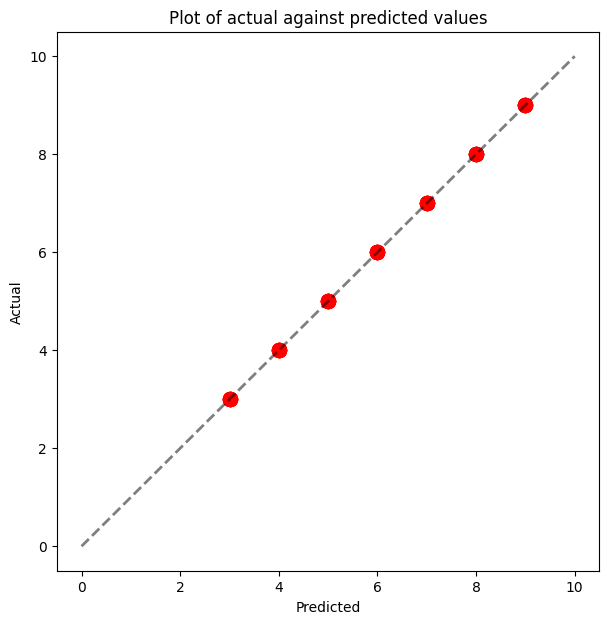

In [68]:
plt.figure(figsize=(7,7))
actuals = train_label.flatten()
plt.plot([0,10], [0,10], color='k', linestyle='--', alpha=0.5, linewidth=2)
plt.scatter(predictions, actuals, s=100, color='r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Plot of actual against predicted values")
plt.show()

### Testing on new input

In [69]:
outside_data = np.array([[6,7,8], [7,8,9], [8,9,10], [9,10,11], [10,11,12]]).reshape(5,3,1)

predictions = model.predict(outside_data).flatten()

# let us see some of the outputs
# for i in range(len(range[:3])):
#     example = train_data[i].flatten()
#     pred = predictions[i]
#     print(f"{example} -> {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


In [70]:
# let us introduce weights to the RNN
model.weights[0].numpy()
model.weights[1].numpy()
model.weights[2].numpy()

array([0.9595445], dtype=float32)

In [71]:
lr = LinearRegression()
lr.fit(train_data.reshape((train_data.shape[0], -1)), train_label.flatten())

LinearRegression()

In [72]:
inputs = outside_data.shape[0]
preds = lr.predict(outside_data.reshape(inputs, -1)).flatten()

#print some outputs
for i in range(len(preds)):
    example = outside_data[i].flatten()
    pred = preds[i]
    print(f'{example} -> {pred}')

[6 7 8] -> 9.0
[7 8 9] -> 10.0
[ 8  9 10] -> 11.0
[ 9 10 11] -> 12.0
[10 11 12] -> 13.0


In [73]:
def sigmoid(v):
    return 1.0 / (1.0 + np.exp(-v))

In [74]:

pattern = np.sin(np.arange(0,6*3.14159,0.1))
pattern += np.random.normal(0,0.05,len(pattern))

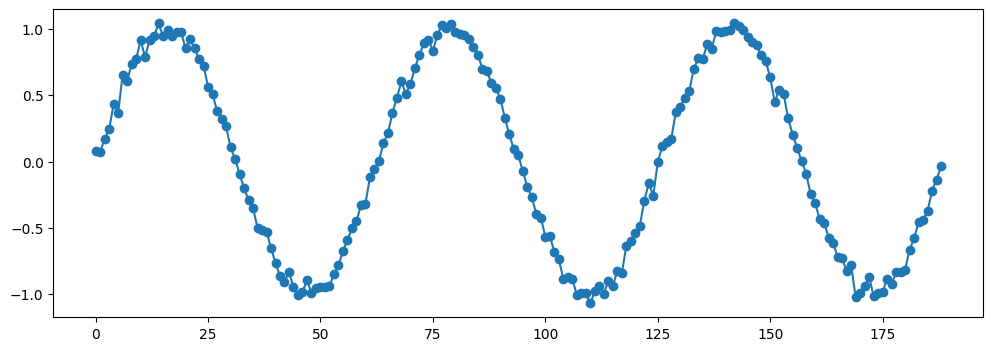

In [75]:
plt.figure(figsize=(12,4))
plt.plot(pattern)
plt.scatter(range(len(pattern)), pattern)

In [76]:
#generate training data
train_data = [np.array(pattern[i:i+window_size]).reshape(1,-1) for i in range(pattern.shape[0]-window_size)]
train_data = np.concatenate(train_data*10, axis=0)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)
train_data[:5]

array([[[0.08121727],
        [0.0692456 ],
        [0.17226074]],

       [[0.0692456 ],
        [0.17226074],
        [0.24187178]],

       [[0.17226074],
        [0.24187178],
        [0.43268872]],

       [[0.24187178],
        [0.43268872],
        [0.3643486 ]],

       [[0.43268872],
        [0.3643486 ],
        [0.65188306]]])

In [77]:
#get training labels
train_label = [pattern[i+window_size] for i in range(pattern.shape[0]-window_size)]
train_label = np.concatenate([train_label]*10).reshape(-1,1)

In [78]:
train_label[:5]

array([[0.24187178],
       [0.43268872],
       [0.3643486 ],
       [0.65188306],
       [0.60615734]])

In [79]:
model =  Sequential()
model.add(SimpleRNN(2, activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.1), metrics=['mse'])

print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [80]:
model.fit(train_data, train_label, epochs=25, verbose=1)

Epoch 1/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0318 - mse: 0.0318
Epoch 2/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 - mse: 0.0071
Epoch 3/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 - mse: 0.0071
Epoch 4/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 5/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075 - mse: 0.0075
Epoch 6/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 - mse: 0.0072
Epoch 7/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 - mse: 0.0074
Epoch 8/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 - mse: 0.0079
Epoch 9/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 - mse: 0.0072
Epoch 10/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0073 - mse: 0.0073
Epoch 11/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0081 - mse: 0.0081
Epoch 12/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0088 - mse: 0.0087
Epoch 13/25
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [81]:
# printing the predictions
preds = []
input_vec = train_data[-1:].copy()
for _ in range(15):
    pred = model.predict(input_vec).flatten()
    preds.append(pred[0])
    input_vec[0][-1] = pred[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


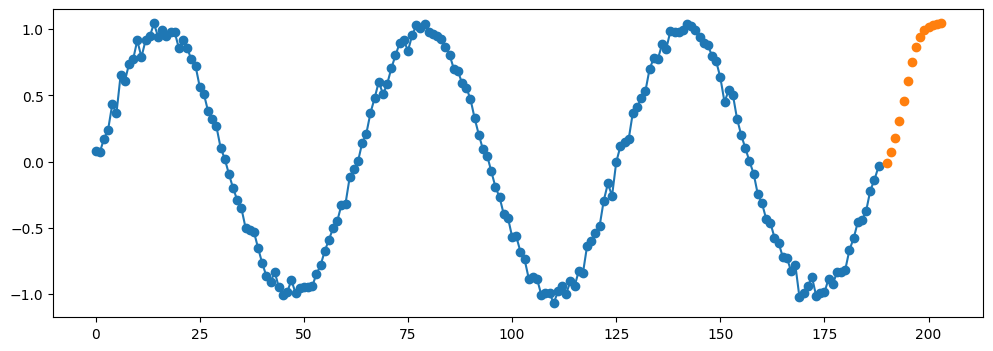

In [82]:
plt.figure(figsize=(12,4))
plt.plot(pattern)
plt.scatter(range(len(pattern)), pattern)
plt.scatter(range(len(pattern)+1, len(pattern)+15), preds[1:])